### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
print('media righe:', m[0].mean(),m[1].mean(),m[2].mean())
print('media colonne:',m[:,0].mean(),m[:,1].mean(),m[:,2].mean())

print('media totale:',m.mean())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
media righe: 1.5 5.5 9.5
media colonne: 4.0 5.0 6.0
media totale: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))
 

out=np.array([[(v[i]*u[j]) for i in range(4) ]for j in range(4)])    

print(out)



print(u.reshape(4,1)*v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
import numpy.random as npr
npr.seed(123)
m=npr.rand(10,6)
print(m,"\n")
for i in range(10):
    if((m[i]<0.1).any()):
        m[i]=0
print(m)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]] 

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664] 

[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26

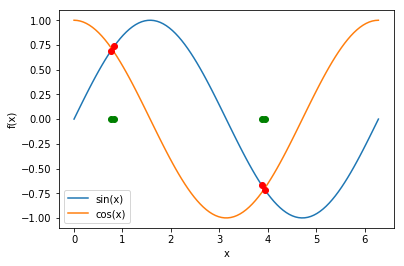

In [11]:
a=np.linspace(0,2*np.pi,100)
print(a[::10],"\n")
print(a[::-1],"\n")
diff=np.absolute(np.sin(a)-np.cos(a))

print(a[diff<0.1],"\n")

import matplotlib.pyplot as plt
%matplotlib inline
s=np.sin(a)
c=np.cos(a)
y=a[diff<0.1]
punti=y*0

plt.plot(a,s,label='sin(x)')
plt.plot(a,c,label='cos(x)')
plt.plot(y,punti,"go",y,np.sin(y),"ro")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [12]:
a=np.arange(1,11)
b=a.reshape(10,1)
c=b*a
print(c)


print(np.array([c[i][9-i] for i in range(10)]))
print(np.array([c[i][i+1] for i in range(9)]))


[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
a=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

b=a.reshape(10,1)

citta=np.array(["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"])
#citte=citta.reshape(10,1)

#un=np.array(["\\"])

#citte1=np.concatenate(un,citte)
c=np.absolute(a-b)
print(c,"\n")
#print(citte.shape)
#d=np.append(citta[:,None],c,1)
#print(d)
#print(d.shape)
#print(np.append(citte[None,:],d,1))

c=np.round(c/1.609)
print(c)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

[[   0.  123.  188.  457.  541.  730.  917.  960. 1189. 1521.]
 [ 123.    0.   65.  334.  418.  607.  794.  837. 1066. 1398.]
 [ 188.   65.    0.  269.  353.  542.  728.  771. 1001. 1333.]
 [ 457.  334.  269.    0.   84.  273.  459.  502.  732. 1064.]
 [ 541.  418.  353.   84.    0.  189.  375.  418.  648.  980.]
 [ 730.  607.  542.  273.  189.    0.  186.  229.  459.  791.]
 [ 917.  794.  728.  459.  375.  186.    0.   43.  272.  605.]
 [ 960.  837.  771.  502. 

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [16]:

def f(a):
    sieve=np.array([True for i in range(a)])

    for i in range(1,a):
        for j in range(2,int(i**(1/2)+1)):
            if i%j==0 & j!=i:
                sieve[i]=False
    return sieve

primi=np.arange(100)
print(primi[f(100)])


for k in range (10,100,10):
    %timeit(f(k))


[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
71.4 µs ± 5.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
130 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
199 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
250 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
311 µs ± 3.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
397 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
452 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
624 µs ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
659 µs ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
for k in range (100,1000,100):
    %timeit(f(k))

786 µs ± 99.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.66 ms ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.76 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.83 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.07 ms ± 9.89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.65 ms ± 684 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.17 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.73 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.3 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


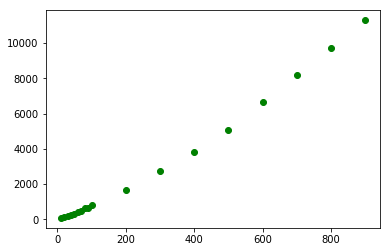

In [20]:
plt.plot(10,71.4,"go",20,130,"go",30,199,"go",40,250,"go",50,311,"go",60,397,"go",70,452,"go",80,624,"go",90,659,"go",100,786,"go",200,1660,"go",300,2760,"go",400,3830,"go",500,5070,"go",600,6650,"go",700,8170,"go",800,9730,"go",900,11300,"go")


Dal grafico lo scaling sembra essere esponenziale

In [5]:

#eratostene

def f(a):
    sieve=np.array([True for i in range(a)])

    j=2
    while j<a:
        for i in range(j**2,a,j):
            sieve[i]=False
        #print(sieve)
        
        k=j+1
        if k==a:

            break
            
        while sieve[k]==False:
            k=k+1
            if k==a:

                break
                            
        j=k
              
    return sieve

primi=np.arange(100)
print(primi[f(100)])


#for k in range (10,100,10):
%timeit(f(100))

[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
1.09 ms ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[-1  1 -1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [-1  1  1 ... -1  1  1]
 [-1 -1 -1 ...  1 -1 -1]
 [-1  1 -1 ... -1  1 -1]]


[[ -1.   0.  -1. ...  -4.  -3.  -4.]
 [  1.   2.   1. ...  18.  17.  16.]
 [  1.   2.   1. ...  16.  15.  16.]
 ...
 [ -1.   0.   1. ... -18. -17. -16.]
 [ -1.  -2.  -3. ...   4.   3.   2.]
 [ -1.   0.  -1. ...  24.  25.  24.]]


[[  1.   0.   1. ...  16.   9.  16.]
 [  1.   4.   1. ... 324. 289. 256.]
 [  1.   4.   1. ... 256. 225. 256.]
 ...
 [  1.   0.   1. ... 324. 289. 256.]
 [  1.   4.   9. ...  16.   9.   4.]
 [  1.   0.   1. ... 576. 625. 576.]]


[  1.      1.976   2.968   4.02    4.8     5.672   6.488   7.364   8.408
   9.192  10.312  11.28   12.152  13.316  14.24   14.82   15.416  16.548
  17.944  19.244  20.032  21.208  22.192  22.924  23.968  25.124  26.192
  26.904  28.     29.036  30.136  31.26   32.552  34.256  35.544  36.768
  37.952  38.74   39.016  39.744  41.08   42.38   43.136  44.724  45.768
  46.664  47.56  

Text(0,0.5,'$\\sigma$')

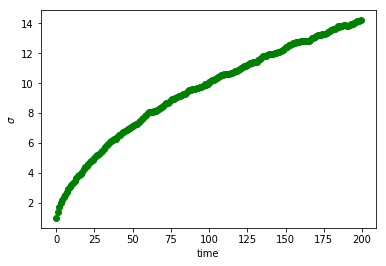

In [13]:
import numpy.random as npr
npr.seed(123) 

a=npr.randint(-1,1,size=(1000,200))
a[a==0]=1
print(a)
print("\n")

b=np.zeros((a.shape[0],a.shape[1]))

for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        b[i][j]=a[i,:j+1].sum()
print(b)
print("\n")

c=b*b
print(c)
print("\n")

d=np.zeros(a.shape[1])
for i in range(a.shape[1]):
    d[i]=c[:,i].mean()
    
print(d)

t=np.arange(a.shape[1])
plt.plot(t,np.sqrt(d),"go")
plt.xlabel('time')
plt.ylabel('$\sigma$')

la varianza delle distanze evolve come la radice del tempo come mi aspetto dal punto di vista teorico

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

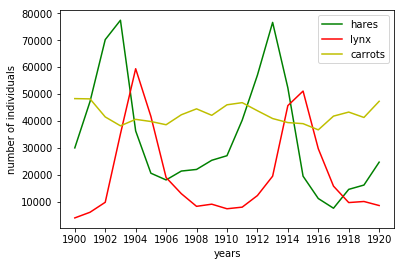

media degli anni: 1910.0 
 popolazione media di lepri: 34080.95238095238 
 popolazione media di linci: 20166.666666666668 
 popolazione media di carote: 42400.0 

varianza degli anni: 1910.0 
 varianza della popolazione di lepri: 20897.906458089667 
 varianza della popolazione di linci: 16254.591536908763 
 varianza della popolazione di carote: 3322.5062255844787 

correlazione (h,l):
 [[1.         0.07189206]
 [0.07189206 1.        ]] 

 correlazione (l,c):
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]] 

  correlazione (c,h):
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]] 

La popolazione maggiore dell'anno 1900.0 è composta da carote
La popolazione maggiore dell'anno 1901.0 è composta da carote
La popolazione maggiore dell'anno 1902.0 è composta da lepri
La popolazione maggiore dell'anno 1903.0 è composta da lepri
La popolazione maggiore dell'anno 1904.0 è composta da linci
La popolazione maggiore dell'anno 1905.0 è composta da linci
La popolazione maggiore dell'an

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.loadtxt("populations.txt", skiprows=1)

y=x[:,0]
h=x[:,1]
l=x[:,2]
c=x[:,3]


plt.plot(y,h,"g", label='hares')
plt.plot(y,l,"r", label='lynx')
plt.plot(y,c,"y", label='carrots')
plt.xlabel('years')
plt.ylabel('number of individuals')
xint = np.arange(min(y),max(y)+1, 2)
plt.xticks(xint)
plt.legend()
plt.show()


y_mean=y.mean()
h_mean=h.mean()
l_mean=l.mean()
c_mean=c.mean()

y_std=y.std()
h_std=h.std()
l_std=l.std()
c_std=c.std()


from scipy.stats.stats import pearsonr 

h_corr=np.corrcoef(h,l)
l_corr=np.corrcoef(l,c)
c_corr=np.corrcoef(c,h)

print("media degli anni:",y_mean,'\n',"popolazione media di lepri:",h_mean,'\n',"popolazione media di linci:",l_mean,'\n',"popolazione media di carote:",c_mean,'\n')
print("varianza degli anni:",y_mean,'\n',"varianza della popolazione di lepri:",h_std,'\n',"varianza della popolazione di linci:",l_std,'\n',"varianza della popolazione di carote:",c_std,'\n')

print("correlazione (h,l):\n",h_corr,'\n\n',"correlazione (l,c):\n", l_corr,'\n\n'," correlazione (c,h):\n", c_corr,'\n')

data=x[:,1:4]


popolazione=np.array(["lepri","linci","carote"])

for year in range(x.shape[0]):


    print("La popolazione maggiore dell'anno", x[year][0], "è composta da",popolazione[data[year].argmax()] )

    